KNN Classification On newgroup

In [406]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as mlt
import os
os.getcwd()

'/Users/pariponthanthong'

In [2]:
# Load Dataset Class
train = pd.read_csv('Desktop/DSC 478/Assignment 2/newsgroups/trainClasses.txt', delimiter = '\t',header = None)
test  = pd.read_csv('Desktop/DSC 478/Assignment 2/newsgroups/testClasses.txt' , delimiter = '\t',header = None)

train_matrix = pd.read_csv('Desktop/DSC 478/Assignment 2/newsgroups/trainMatrixModified.txt', delimiter = '\t',header = None)
test_matrix  = pd.read_csv('Desktop/DSC 478/Assignment 2/newsgroups/testMatrixModified.txt', delimiter = '\t', header = None)

modified     = pd.read_csv('Desktop/DSC 478/Assignment 2/newsgroups/modifiedterms.txt', delimiter = '\t',header = None)

In [3]:
## Get Data Ready (Class Label)
## Select column label only
train_target = np.array(train.iloc[:,1])
test_target = np.array(test.iloc[:,1])

In [4]:
## Get data matrix Ready
train_matrixT = train_matrix.T
test_matrixT = test_matrix.T
train_matrixT.shape,test_matrixT.shape

((800, 5500), (200, 5500))

In [5]:
## Get data matrix Ready
train_matrixT_np = np.array(train_matrixT)
test_matrixT_np = np.array(test_matrixT)
type(train_matrixT_np) , test_matrixT_np.shape

(numpy.ndarray, (200, 5500))

In [6]:
#    A   # 
## KNN Function
# x = test target( Target array)
# D = training set (Train Array)
# K = number of k
# measure is a parameter to ren the function based on 0 = euclidean and 1 = Cosine similarity
def knn_search_(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists
## This fucntion will return 2 value
# 1 - array with number of k
# 2 - it will return the distance based on measure parameter

In [7]:
# Let's use vs_test as a test instance x and find its K nearest neighbors
# Use the whole rain and Test
# Use Transpose on matrix dataset

# For eclidian
newg_idx, distances = knn_search_(test_matrixT[0], train_matrixT, 10 ,0)

In [8]:
# For Cosine
newg_idx_c, distances_c = knn_search_(test_matrixT_np[0], train_matrixT_np, 10 ,1)

In [9]:
print (newg_idx)
print ("\n")
train_matrix.iloc[newg_idx]

0    755
1    486
2    645
3    373
4     20
5    342
6    119
7    683
8    658
9     81
dtype: int64




0    1    2    3    4    5    6    7    8    9   ...   790  791  792  \
755  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   2.0  0.0  0.0   
486  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0 ...   0.0  0.0  0.0   
645  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
373  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
20   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
342  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
119  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
683  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
658  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
81   2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

     793  794  795  796  797  798  799  
755  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
486  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
645  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
373  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
20   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
342  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
119  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
683  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
658  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
81   0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 800 columns]

In [10]:
# Distance
print (distances[newg_idx])

755    6.403124
486    6.708204
645    7.000000
373    7.000000
20     7.071068
342    7.141428
119    7.141428
683    7.141428
658    7.141428
81     7.141428
dtype: float64


In [11]:
newg_labels = train_target[newg_idx]
print (newg_labels)
newg_labels.shape

[0 0 0 1 0 0 0 0 0 0]


(10,)

In [12]:
from collections import Counter
print (Counter(newg_labels))

Counter({0: 9, 1: 1})


In [13]:
Counter(newg_labels).most_common(1)

[(0, 9)]

In [14]:
import operator
def knn(x, D, K,labels,measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    #return idx[:K], dists
    classCount={}          
    for i in range(K):
        voteIlabel = labels[idx[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return idx[:K],sortedClassCount[0][0]

In [15]:
print(test_matrixT_np.shape)
train_matrixT_np

(200, 5500)


array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
new_idx, predicted = knn(test_matrixT_np[5],train_matrixT_np ,5,train_target ,1)
print( new_idx)
print('Class:', predicted)

[425 149 779 651 438]
Class: 0


In [17]:
# A try on dataset
length = len(test_target)
error = 0.0
for i in range(length):
    newg_idx, pred = knn(test_matrixT_np[i,:], train_matrixT_np,3,train_target, 0)
    print ("the classifier came back with: %s, the real answer is: %s" % (pred, test_target[i]))
    if (pred !=test_target[i]): 
        error += 1.0
        error_ = error/ float(length)
print ("the total error rate is: %f" % (error/float(length)))

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answe

the classifier came back with: 1, the real answer is: 0
the classifier came back with: 1, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answe

#### Accuracy

In [18]:
## Accuracy Function
def accuracy(label,x, D, K, measure):
    length_label = len(label)
    error = 0.0
    for i in range(length_label):
        newg_idx, pred = knn(test_matrixT_np[i,:], train_matrixT_np,K,train_target, 0)
        if (pred !=label[i]): 
            error += 1.0
            error_ = error/ float(length_label)
    return error_

In [19]:
accuracy(test_target,test_matrixT_np[0],train_matrixT_np ,3 ,0) 

0.19

In [20]:
for i in range(1,21):
    euc = accuracy(test_target,test_matrixT_np,train_matrixT_np ,i+1 ,0) 
    cosi = accuracy(test_target,test_matrixT_np,train_matrixT_np ,i+1 ,1)
    print('K:',i,'Euc: %s '% euc ,'cosi: %s' % cosi)
    

K: 1 Euc: 0.22  cosi: 0.22
K: 2 Euc: 0.19  cosi: 0.19
K: 3 Euc: 0.19  cosi: 0.19
K: 4 Euc: 0.185  cosi: 0.185
K: 5 Euc: 0.165  cosi: 0.165
K: 6 Euc: 0.235  cosi: 0.235
K: 7 Euc: 0.2  cosi: 0.2
K: 8 Euc: 0.25  cosi: 0.25
K: 9 Euc: 0.15  cosi: 0.15
K: 10 Euc: 0.205  cosi: 0.205
K: 11 Euc: 0.155  cosi: 0.155
K: 12 Euc: 0.225  cosi: 0.225
K: 13 Euc: 0.185  cosi: 0.185
K: 14 Euc: 0.215  cosi: 0.215
K: 15 Euc: 0.2  cosi: 0.2
K: 16 Euc: 0.24  cosi: 0.24
K: 17 Euc: 0.215  cosi: 0.215
K: 18 Euc: 0.26  cosi: 0.26
K: 19 Euc: 0.235  cosi: 0.235
K: 20 Euc: 0.265  cosi: 0.265


In [259]:
#load Dataset for Matrix and term

new_train_matrix = np.genfromtxt('Desktop/DSC 478/Assignment 2/newsgroups/trainMatrixModified.txt',delimiter="\t", dtype = float)
new_test_matrix = np.genfromtxt('Desktop/DSC 478/Assignment 2/newsgroups/testMatrixModified.txt',delimiter="\t",dtype = float)
new_modified = pd.read_csv('Desktop/DSC 478/Assignment 2/newsgroups/modifiedterms.txt', delimiter = '\t', header = None)

In [260]:
new_train_matrix = new_train_matrix.T
new_test_matrix = new_test_matrix.T

In [261]:
numTerms=new_train_matrix.shape[0]
NDocs = new_train_matrix.shape[1]
print(numTerms)
print(NDocs)

800
5500


In [325]:
termFreqs = new_train_matrix.sum(axis=1)

In [271]:
terms = new_modified.iloc[:,0]

1

In [275]:
terms=terms.fillna('')

#### TFxIDF weight

In [276]:
dictTF = {}
for i in range(numTerms):
               dictTF[terms[i]] = termFreqs[i]
print (sorted(dictTF.items()))
sortedTF = sorted(dictTF.values(), reverse=True)
print (sortedTF)

[('', 128.0), ('00', 159.0), ('10', 254.0), ('1010', 105.0), ('125', 74.0), ('14', 100.0), ('1990', 73.0), ('1991', 159.0), ('1992', 23.0), ('1993', 80.0), ('1st', 67.0), ('20', 32.0), ('21', 61.0), ('25', 136.0), ('2nd', 24.0), ('30', 59.0), ('4324219', 24.0), ('50', 78.0), ('5000', 286.0), ('63', 44.0), ('635', 42.0), ('705', 78.0), ('89', 204.0), ('919', 113.0), ('999', 32.0), ('abc', 172.0), ('abl', 73.0), ('accept', 195.0), ('access', 53.0), ('act', 168.0), ('activ', 107.0), ('actual', 485.0), ('adam', 81.0), ('add', 205.0), ('addit', 53.0), ('address', 31.0), ('admit', 81.0), ('admittedli', 202.0), ('advanc', 125.0), ('advantag', 45.0), ('advic', 75.0), ('afternoon', 102.0), ('ago', 78.0), ('allstar', 47.0), ('altern', 2.0), ('amount', 330.0), ('analyst', 51.0), ('anderson', 99.0), ('andrewcmuedu', 28.0), ('angel', 253.0), ('angelo', 72.0), ('announc', 48.0), ('anonym', 28.0), ('anybodi', 89.0), ('anymor', 89.0), ('anywai', 792.0), ('app', 50.0), ('appear', 214.0), ('appropri', 7

In [277]:
sorted(dictTF.items())

[('', 128.0),
 ('00', 159.0),
 ('10', 254.0),
 ('1010', 105.0),
 ('125', 74.0),
 ('14', 100.0),
 ('1990', 73.0),
 ('1991', 159.0),
 ('1992', 23.0),
 ('1993', 80.0),
 ('1st', 67.0),
 ('20', 32.0),
 ('21', 61.0),
 ('25', 136.0),
 ('2nd', 24.0),
 ('30', 59.0),
 ('4324219', 24.0),
 ('50', 78.0),
 ('5000', 286.0),
 ('63', 44.0),
 ('635', 42.0),
 ('705', 78.0),
 ('89', 204.0),
 ('919', 113.0),
 ('999', 32.0),
 ('abc', 172.0),
 ('abl', 73.0),
 ('accept', 195.0),
 ('access', 53.0),
 ('act', 168.0),
 ('activ', 107.0),
 ('actual', 485.0),
 ('adam', 81.0),
 ('add', 205.0),
 ('addit', 53.0),
 ('address', 31.0),
 ('admit', 81.0),
 ('admittedli', 202.0),
 ('advanc', 125.0),
 ('advantag', 45.0),
 ('advic', 75.0),
 ('afternoon', 102.0),
 ('ago', 78.0),
 ('allstar', 47.0),
 ('altern', 2.0),
 ('amount', 330.0),
 ('analyst', 51.0),
 ('anderson', 99.0),
 ('andrewcmuedu', 28.0),
 ('angel', 253.0),
 ('angelo', 72.0),
 ('announc', 48.0),
 ('anonym', 28.0),
 ('anybodi', 89.0),
 ('anymor', 89.0),
 ('anywai', 7

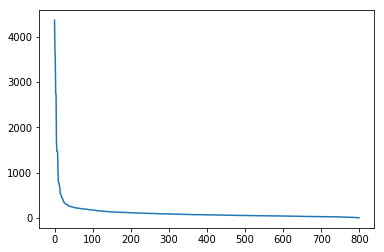

In [278]:
import matplotlib.pyplot as plt
plt.plot(sortedTF)
plt.show()

#### Next, we will transform the data to TFxIDF weights

In [279]:
# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc count for each term
DF = np.array([(new_train_matrix!=0).sum(1)]).T
print (DF)
print(DF.shape)

[[  98]
 [  61]
 [  43]
 [  35]
 [  26]
 [ 161]
 [  94]
 [  44]
 [  45]
 [ 180]
 [  86]
 [  52]
 [ 218]
 [  56]
 [  40]
 [  75]
 [  40]
 [  37]
 [  98]
 [  56]
 [  12]
 [ 107]
 [  17]
 [  24]
 [  78]
 [  53]
 [  27]
 [  47]
 [  42]
 [ 150]
 [  62]
 [  76]
 [  25]
 [ 155]
 [  49]
 [  35]
 [  65]
 [ 119]
 [   4]
 [ 996]
 [  18]
 [  55]
 [  58]
 [  87]
 [  19]
 [  84]
 [  32]
 [  44]
 [ 116]
 [ 371]
 [  69]
 [  45]
 [  46]
 [  15]
 [  24]
 [  25]
 [ 100]
 [  82]
 [  29]
 [  38]
 [   9]
 [  72]
 [  31]
 [  85]
 [  59]
 [  81]
 [  99]
 [  53]
 [ 107]
 [  10]
 [  31]
 [  39]
 [  50]
 [  64]
 [  67]
 [  54]
 [  42]
 [ 126]
 [  28]
 [ 162]
 [  47]
 [   9]
 [ 124]
 [  32]
 [  66]
 [  78]
 [ 114]
 [  68]
 [  45]
 [ 139]
 [  36]
 [  22]
 [  51]
 [  99]
 [  65]
 [  90]
 [ 131]
 [  37]
 [  22]
 [  52]
 [  76]
 [  21]
 [  24]
 [  52]
 [ 158]
 [  25]
 [  58]
 [  31]
 [  54]
 [  42]
 [  68]
 [  33]
 [  20]
 [  77]
 [  65]
 [ 166]
 [ 108]
 [  53]
 [ 163]
 [   7]
 [  30]
 [  14]
 [  49]
 [  72]
 [  68]


In [348]:
DF1 = np.array([(new_test_matrix!=0).sum(1)]).T
print (DF)
print(DF.shape)

[[117]
 [ 47]
 [ 50]
 [243]
 [ 54]
 [ 44]
 [ 87]
 [ 32]
 [ 31]
 [ 56]
 [486]
 [ 66]
 [ 72]
 [ 30]
 [ 60]
 [ 80]
 [ 64]
 [ 26]
 [ 17]
 [ 48]
 [513]
 [ 46]
 [ 35]
 [ 38]
 [226]
 [ 30]
 [ 44]
 [ 28]
 [ 67]
 [ 25]
 [ 38]
 [ 56]
 [ 78]
 [ 93]
 [ 44]
 [ 62]
 [ 20]
 [ 72]
 [ 20]
 [ 61]
 [  7]
 [ 30]
 [ 25]
 [ 44]
 [ 57]
 [173]
 [ 99]
 [ 64]
 [ 58]
 [ 16]
 [ 41]
 [ 30]
 [ 65]
 [ 51]
 [ 29]
 [ 26]
 [ 79]
 [ 55]
 [ 68]
 [338]
 [ 26]
 [ 34]
 [ 91]
 [ 71]
 [ 44]
 [ 41]
 [108]
 [187]
 [114]
 [ 95]
 [102]
 [ 68]
 [ 56]
 [ 46]
 [ 58]
 [948]
 [ 49]
 [ 23]
 [ 49]
 [ 80]
 [ 16]
 [ 39]
 [ 36]
 [ 69]
 [ 13]
 [ 75]
 [ 45]
 [ 37]
 [ 23]
 [118]
 [ 37]
 [ 51]
 [ 79]
 [ 20]
 [ 30]
 [ 16]
 [ 18]
 [ 61]
 [ 23]
 [346]
 [ 40]
 [ 46]
 [ 58]
 [ 72]
 [ 47]
 [ 12]
 [173]
 [ 88]
 [ 84]
 [ 37]
 [ 65]
 [220]
 [ 32]
 [ 50]
 [131]
 [ 80]
 [  4]
 [ 91]
 [ 95]
 [ 47]
 [ 75]
 [ 41]
 [ 33]
 [ 27]
 [ 42]
 [122]
 [ 82]
 [ 61]
 [ 64]
 [ 29]
 [ 50]
 [ 16]
 [ 33]
 [ 75]
 [ 47]
 [ 93]
 [ 92]
 [ 22]
 [ 41]
 [ 80]
 [688]
 [ 45]
 [ 42]

In [326]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(new_train_matrix), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print (NMatrix.shape)

(800, 5500)


In [323]:
# Create a matrix with all entries = NDocs
NMatrix1=np.ones(np.shape(new_test_matrix), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print (NMatrix1.shape)

(200, 5500)


In [349]:
IDF1 = np.log2(np.divide(NMatrix1, DF1))
print(IDF)
print(IDF.shape)

[[ 5.81  5.81  5.81 ...  5.81  5.81  5.81]
 [ 6.49  6.49  6.49 ...  6.49  6.49  6.49]
 [ 7.    7.    7.   ...  7.    7.    7.  ]
 ...
 [ 6.22  6.22  6.22 ...  6.22  6.22  6.22]
 [11.43 11.43 11.43 ... 11.43 11.43 11.43]
 [ 6.09  6.09  6.09 ...  6.09  6.09  6.09]]
(800, 5500)


In [321]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, DF))
print(IDF)
print(IDF.shape)

[[ 5.81  5.81  5.81 ...  5.81  5.81  5.81]
 [ 6.49  6.49  6.49 ...  6.49  6.49  6.49]
 [ 7.    7.    7.   ...  7.    7.    7.  ]
 ...
 [ 6.22  6.22  6.22 ...  6.22  6.22  6.22]
 [11.43 11.43 11.43 ... 11.43 11.43 11.43]
 [ 6.09  6.09  6.09 ...  6.09  6.09  6.09]]
(800, 5500)


In [320]:
new_train_matrix

array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [285]:
# Finally compute the TFxIDF values for each document-term entry
new_train_matrix_tfidf = new_train_matrix * IDF
new_train_matrix_tfidf.shape

(800, 5500)

In [287]:
pd.set_option("display.precision", 2)

new_train_matrix_tfidf.shape

(800, 5500)

In [304]:
new_test_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [399]:
# Each term in x must be multiplied by the corresponding idf value
x_tfidf = new_test_matrix * IDF1
print(x_tfidf.shape)

(200, 5500)


In [353]:
# The KNN Search function expects a doc x term matrix as an np array
new_train_matrix_tfidf_T = new_train_matrix_tfidf.T 
new_train_matrix_tfidf_T.shape

(5500, 800)

In [366]:
print(new_train_matrix_tfidf.shape)
print(x_tfidf.shape)

(800, 5500)
(200, 5500)


In [400]:
n_idx, distances = knn_search_(x_tfidf[0], new_train_matrix_tfidf, 5, 0)

In [401]:
print (new_train_matrix_tfidf[n_idx])
print ("\n")
print ("Distances to x: ", np.sort(distances)[0:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Distances to x:  [76.67 88.07 88.1  88.55 89.11]


In [403]:
# Accuracy(Error rate) For TFIDF FUCNtion
def accuracy1(label,x, D, K, measure):
    length_label = len(label)
    error = 0.0
    for i in range(length_label):
        newg_idx, pred = knn(x_tfidf[i,:], new_train_matrix_tfidf,K,train_target, 0)
        if (pred !=label[i]): 
            error += 1.0
            error_ = error/ float(length_label)
    return error_




In [404]:
for i in range(1,21):
    euc = accuracy1(test_target,x_tfidf,new_train_matrix_tfidf ,i+1 ,0) 
    cosi = accuracy1(test_target,x_tfidf,new_train_matrix_tfidf ,i+1 ,1)
    print('K:',i,'Euc: %s '% euc ,'cosi: %s' % cosi)

K: 1 Euc: 0.265  cosi: 0.265
K: 2 Euc: 0.225  cosi: 0.225
K: 3 Euc: 0.225  cosi: 0.225
K: 4 Euc: 0.16  cosi: 0.16
K: 5 Euc: 0.14  cosi: 0.14
K: 6 Euc: 0.2  cosi: 0.2
K: 7 Euc: 0.195  cosi: 0.195
K: 8 Euc: 0.23  cosi: 0.23
K: 9 Euc: 0.15  cosi: 0.15
K: 10 Euc: 0.2  cosi: 0.2
K: 11 Euc: 0.155  cosi: 0.155
K: 12 Euc: 0.175  cosi: 0.175
K: 13 Euc: 0.1  cosi: 0.1
K: 14 Euc: 0.155  cosi: 0.155
K: 15 Euc: 0.12  cosi: 0.12
K: 16 Euc: 0.165  cosi: 0.165
K: 17 Euc: 0.125  cosi: 0.125
K: 18 Euc: 0.17  cosi: 0.17
K: 19 Euc: 0.15  cosi: 0.15
K: 20 Euc: 0.165  cosi: 0.165


In [ ]:
def knn_accuracy(T, D, L, K, measure):

    matches = 0.00
    count = len(T)
    i = 0
    
    while i < count:
        
        neigh_idx, distances, predictedClass = knn_search(np.array(T.iloc[i]), D, L, K, measure)
        
        isMatch = predictedClass == L.iloc[[i],[1]]

        if isMatch.bool() == True:
            matches += 1
            
        i += 1
    
    # return accuracy measure
    return matches / count

#### Rocchio

#### Classification with sklearn

In [41]:
bank = pd.read_csv(r'Desktop/DSC 478/DSC 478 Week 2/Assignment 1/bank_data.csv', sep = ',')
bank.head()

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

In [42]:
bank.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [43]:
#Bank Attribute
bank_att = bank[['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage']]
bank_att.head()

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  
0           NO           NO       NO  
1           NO          YES      YES  
2          YES          YES       NO  
3           NO          YES       NO  
4          YES           NO       NO

In [44]:
#Bank Target Attribute
bank_target = bank.pep
bank_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

#### Next, we use Pandas "get_dummies" function to create dummy variables. 

In [45]:
b_matrix = pd.get_dummies(bank_att)
b_matrix.head(10)

age    income  children  id_ID12101  id_ID12102  id_ID12103  id_ID12104  \
0   48  17546.00         1           1           0           0           0   
1   40  30085.10         3           0           1           0           0   
2   51  16575.40         0           0           0           1           0   
3   23  20375.40         3           0           0           0           1   
4   57  50576.30         0           0           0           0           0   
5   57  37869.60         2           0           0           0           0   
6   22   8877.07         0           0           0           0           0   
7   58  24946.60         0           0           0           0           0   
8   37  25304.30         2           0           0           0           0   
9   54  24212.10         2           0           0           0           0   

   id_ID12105  id_ID12106  id_ID12107      ...       married_NO  married_YES  \
0           0           0           0      ...                1            0   
1           0           0           0      ...                0            1   
2           0           0           0      ...                0            1   
3           0           0           0      ...                0            1   
4           1           0           0      ...                0            1   
5           0           1           0      ...                0            1   
6           0           0           1      ...                1            0   
7           0           0           0      ...                0            1   
8           0           0           0      ...                0            1   
9           0           0           0      ...                0            1   

   car_NO  car_YES  savings_acct_NO  savings_acct_YES  current_acct_NO  \
0       1        0                1                 0                1   
1       0        1                1                 0                0   
2       0        1                0                 1                0   
3       1        0                1                 0                0   
4       1        0                0                 1                1   
5       1        0                0                 1                0   
6       1        0                1                 0                0   
7       0        1                0                 1                0   
8       0        1                1                 0                1   
9       0        1                0                 1                0   

   current_acct_YES  mortgage_NO  mortgage_YES  
0                 0            1             0  
1                 1            0             1  
2                 1            1             0  
3                 1            1             0  
4                 0            1             0  
5                 1            1             0  
6                 1            1             0  
7                 1            1             0  
8                 0            1             0  
9                 1            1             0  

[10 rows x 619 columns]

#### Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation". 

In [46]:
from sklearn.model_selection import train_test_split
b_train, b_test, b_target_train, b_target_test = train_test_split(b_matrix, bank_target, test_size=0.2, random_state=33)

print (b_test.shape)
b_test[0:5]

(120, 619)


age   income  children  id_ID12101  id_ID12102  id_ID12103  id_ID12104  \
456   32  13267.6         0           0           0           0           0   
366   59  29866.9         1           0           0           0           0   
131   61  41609.5         3           0           0           0           0   
448   53  48971.6         3           0           0           0           0   
337   65  38080.9         1           0           0           0           0   

     id_ID12105  id_ID12106  id_ID12107      ...       married_NO  \
456           0           0           0      ...                0   
366           0           0           0      ...                1   
131           0           0           0      ...                0   
448           0           0           0      ...                0   
337           0           0           0      ...                0   

     married_YES  car_NO  car_YES  savings_acct_NO  savings_acct_YES  \
456            1       0        1                0                 1   
366            0       0        1                1                 0   
131            1       1        0                0                 1   
448            1       0        1                0                 1   
337            1       0        1                0                 1   

     current_acct_NO  current_acct_YES  mortgage_NO  mortgage_YES  
456                0                 1            0             1  
366                0                 1            1             0  
131                0                 1            0             1  
448                1                 0            1             0  
337                1                 0            0             1  

[5 rows x 619 columns]

In [47]:
print (b_train.shape)
b_train[0:5]

(480, 619)


age   income  children  id_ID12101  id_ID12102  id_ID12103  id_ID12104  \
381   46  32583.5         2           0           0           0           0   
4     57  50576.3         0           0           0           0           0   
86    25  15525.0         0           0           0           0           0   
83    35  16394.4         1           0           0           0           0   
523   34  16291.0         0           0           0           0           0   

     id_ID12105  id_ID12106  id_ID12107      ...       married_NO  \
381           0           0           0      ...                0   
4             1           0           0      ...                0   
86            0           0           0      ...                0   
83            0           0           0      ...                0   
523           0           0           0      ...                0   

     married_YES  car_NO  car_YES  savings_acct_NO  savings_acct_YES  \
381            1       0        1                0                 1   
4              1       1        0                0                 1   
86             1       1        0                0                 1   
83             1       1        0                0                 1   
523            1       0        1                0                 1   

     current_acct_NO  current_acct_YES  mortgage_NO  mortgage_YES  
381                0                 1            1             0  
4                  1                 0            1             0  
86                 0                 1            1             0  
83                 0                 1            1             0  
523                1                 0            0             1  

[5 rows x 619 columns]

#### Performing min-max normalization to rescale numeric attributes.

In [48]:
from sklearn import preprocessing

In [49]:
# normalize dataset for KNN 0-1 Min-Max
min_max_scaler = preprocessing.MinMaxScaler().fit(b_train)
b_train_norm = min_max_scaler.transform(b_train)
b_test_norm = min_max_scaler.transform(b_test)

In [50]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
b_train_norm[0:5]

array([[0.57, 0.46, 0.67, ..., 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , ..., 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , ..., 1.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, ..., 1.  , 1.  , 0.  ],
       [0.33, 0.18, 0.  , ..., 0.  , 0.  , 1.  ]])

In [51]:
b_test_norm[0:5]

array([[0.29, 0.12, 0.  , ..., 1.  , 0.  , 1.  ],
       [0.84, 0.41, 0.33, ..., 1.  , 1.  , 0.  ],
       [0.88, 0.62, 1.  , ..., 1.  , 0.  , 1.  ],
       [0.71, 0.75, 1.  , ..., 0.  , 1.  , 0.  ],
       [0.96, 0.56, 0.33, ..., 0.  , 0.  , 1.  ]])

#### We will use the KNN, decision tree, and naive Bayes classifiers from sklearn.

In [52]:
from sklearn import neighbors, tree, naive_bayes

#### First, we'll use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.

In [53]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(b_train_norm, b_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

#### Next, we call the predict function on the test intances to produce the predicted classes.

In [58]:
knnpreds_test = knnclf.predict(b_test_norm)

In [59]:
print(knnpreds_test)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


#### scikit-learn has various modules that can be used to evaluate classifier accuracy

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(b_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.69      0.73      0.71        66
         YES       0.64      0.59      0.62        54

    accuracy                           0.67       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.67      0.67      0.67       120



In [62]:
# For confusing matrix
from sklearn.metrics import confusion_matrix

In [63]:
knncm = confusion_matrix(b_target_test, knnpreds_test)
print (knncm)

[[48 18]
 [22 32]]


#### We can also compute the average accuracy score across the test instances

In [64]:
print (knnclf.score(b_test_norm, b_target_test))

0.6666666666666666


#### This can be compared to the performance on the training data itself (to check for over- or under-fitting)

In [65]:
print (knnclf.score(b_train_norm, b_target_train))

0.7833333333333333


#### Without weight Distance

In [82]:
# Without weitgh 'distance'
n_neighbors = 10

knnclf = neighbors.KNeighborsClassifier(n_neighbors)
knnclf.fit(b_train_norm, b_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [77]:
knnpreds_test = knnclf.predict(b_test_norm)
print(knnpreds_test)

['NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [78]:
print(classification_report(b_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.67      0.76      0.71        66
         YES       0.64      0.54      0.59        54

    accuracy                           0.66       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.66      0.66      0.65       120



In [79]:
knncm = confusion_matrix(b_target_test, knnpreds_test)
print (knncm)

[[50 16]
 [25 29]]


In [80]:
print (knnclf.score(b_test_norm, b_target_test))

0.6583333333333333


In [81]:
print (knnclf.score(b_train_norm, b_target_train))

1.0


## Discussion
 From the differnces of number of k and without weight distance, the number of k play a big part of the score which you can see that k = 10 changes the score. However, it is not ganrantee that the higher of k will increase the score. There will be a point where the score will not increase anymore. Moreover, the weight distance also play a big part as the parameter, i set the weight and the score become 1.0 for predicting training set , but the test set score dropped down about 0.4.

#### Decision Tree Classification

In [83]:
# Assign sklearn with entropy parameter 
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [84]:
# for training
treeclf = treeclf.fit(b_train, b_target_train)

In [85]:
treepreds_test = treeclf.predict(b_test)
print (treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES']


In [86]:
# Accuracy for test set
print (treeclf.score(b_test, b_target_test))

0.8583333333333333


In [87]:
# Accuracy for train set
print (treeclf.score(b_train, b_target_train))

1.0


In [88]:
# Classification Report
print(classification_report(b_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.85      0.91      0.88        66
         YES       0.88      0.80      0.83        54

    accuracy                           0.86       120
   macro avg       0.86      0.85      0.86       120
weighted avg       0.86      0.86      0.86       120



In [89]:
# Confusion Matrix
treecm = confusion_matrix(b_target_test, treepreds_test)
print (treecm)

[[60  6]
 [11 43]]


#### We can actually plot the confusion matrix for better visualization:

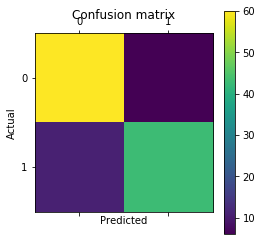

In [90]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### (Gaussian) naive Bayes classifier

In [91]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(b_train, b_target_train)
nbpreds_test = nbclf.predict(b_test)
print (nbpreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO']


In [92]:
# Training Score
print (nbclf.score(b_train, b_target_train))

0.6791666666666667


In [93]:
# Test Score
print (nbclf.score(b_test, b_target_test))

0.5916666666666667


#### Discussion

Decision Tree score Test/Train : .85/1.0

Naive Bayes score Test/Train : .59/.67

What is this bias-variance trade-off tells us. In the DT (Decistion Tree), the score show 100% prediction accuracy and test at 85%. Which mean the decision tree predict very accurate, but it could also not generalize well with other dataset and It could create the overfitting problem. For the Naive Bayes, test and train score prediction seem to be average. The prediction score is plummeted from DT for almost .3 for both train and test.



In [95]:

## Load Adult Census Data.
cencus = pd.read_csv(r'Desktop/DSC 478/Assignment 2/adult-modified.csv', na_values=["?"])
cencus.head()

age workclass  education marital-status   race     sex  hours-per-week  \
0  39.0    Public         13         Single  White    Male              40   
1  50.0  Self-emp         13        Married  White    Male              13   
2  38.0   Private          9         Single  White    Male              40   
3  53.0   Private          7        Married  Black    Male              40   
4  28.0   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

In [96]:
cencus.shape

(10000, 8)

In [97]:
cencus.isnull().sum()

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [98]:
cencus[cencus.workclass.isnull()].head()

age workclass  education marital-status   race     sex  hours-per-week  \
27    NaN       NaN         10        Married  Asian    Male              60   
61   32.0       NaN          4        Married  White    Male              40   
69   25.0       NaN         10         Single  White    Male              40   
77   67.0       NaN          6        Married  White    Male               2   
106  17.0       NaN          6         Single  White  Female              32   

    income  
27    >50K  
61   <=50K  
69   <=50K  
77   <=50K  
106  <=50K

In [99]:
cencus[cencus.age.isnull()].head()

age workclass  education marital-status   race     sex  hours-per-week  \
19  NaN  Self-emp         14         Single  White  Female              45   
27  NaN       NaN         10        Married  Asian    Male              60   
40  NaN   Private          5        Married  White    Male              43   
65  NaN   Private          9        Married  White    Male              40   
80  NaN   Private          9         Single  White    Male              30   

   income  
19   >50K  
27   >50K  
40  <=50K  
65  <=50K  
80  <=50K

In [100]:
# Fill missing value with mean in age attribute
age_mean = cencus.age.mean()
cencus.age.fillna(age_mean, axis=0, inplace=True)
cencus.isnull().sum()

age                 0
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [101]:
# Drop the rest of the missing value from workclass attribute
cencus.dropna(axis=0, inplace=True)
print(cencus.isnull().sum())
print(cencus.shape)

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64
(9412, 8)


In [102]:
cencus.describe()

age  education  hours-per-week
count  9412.00    9412.00         9412.00
mean     38.37      10.13           41.08
std      12.96       2.54           11.88
min      17.00       1.00            1.00
25%      28.00       9.00           40.00
50%      37.00      10.00           40.00
75%      47.00      13.00           45.00
max      90.00      16.00           99.00

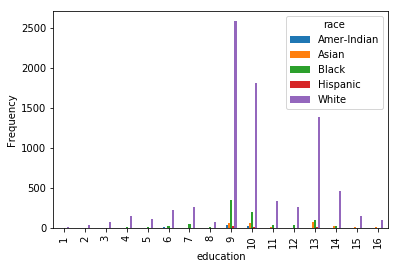

In [103]:
## education + race crosstabulation
plot1 = pd.crosstab(cencus['education'],cencus['race']).plot(kind = 'bar')
plot1.set_ylabel("Frequency")
plt.show(plot1)

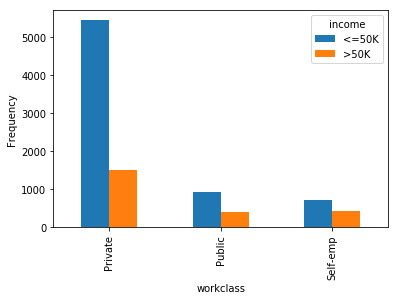

In [104]:
## workclass+income crosstabulation
plot2 = pd.crosstab(cencus['workclass'],cencus['income']).plot(kind = 'bar')
plot2.set_ylabel("Frequency")
plt.show(plot2)

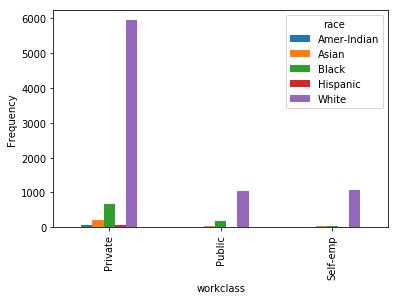

In [105]:
## workclass+race crosstabulation
plot3 = pd.crosstab(cencus['workclass'],cencus['race']).plot(kind = 'bar')
plot3.set_ylabel("Frequency")
plt.show(plot3)

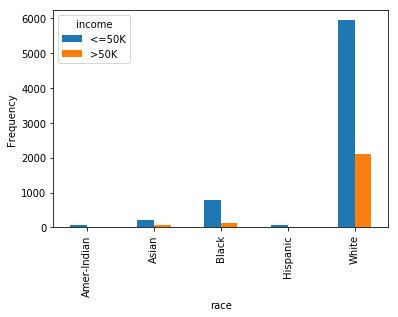

In [106]:
##  race+income crosstabulation
plot4 = pd.crosstab(cencus['race'],cencus['income']).plot(kind = 'bar')
plot4.set_ylabel("Frequency")
plt.show(plot4)

In [107]:
# table or chart showing percentages of each race category that fall in the low-income group
pd.crosstab(cencus['race'],cencus['income'])/cencus.shape[0]*100

income       <=50K   >50K
race                     
Amer-Indian   0.88   0.10
Asian         2.38   0.71
Black         8.21   1.26
Hispanic      0.73   0.06
White        63.15  22.50

In [108]:
# Compare income to another categories 
pd.crosstab(cencus['workclass'],cencus['income'])/cencus.shape[0]*100

income     <=50K   >50K
workclass              
Private    57.83  15.98
Public      9.83   4.16
Self-emp    7.70   4.49

####  Predictive Modeling and Model Evaluation

In [109]:
cencus2 = pd.get_dummies(cencus)
cencus2.head(10)


age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   
5  37.0         14              40                  1                 0   
6  49.0          5              16                  1                 0   
7  52.0          9              45                  0                 0   
8  31.0         14              50                  1                 0   
9  42.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   
5                   0                       1                      0   
6                   0                       1                      0   
7                   1                       1                      0   
8                   0                       0                      1   
9                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   
5                 0           0           0              0           1   
6                 0           0           1              0           0   
7                 0           0           0              0           1   
8                 0           0           0              0           1   
9                 0           0           0              0           1   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0  
5           1         0             1            0  
6           1         0             1            0  
7           0         1             0            1  
8           1         0             0            1  
9           0         1             0            1

In [110]:
# drop columns that income lower that 50k
cencus3 = cencus2.drop(columns = ['income_<=50K'], axis = 1)
cencus3.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_>50K  
0           0         1            0  
1           0         1            0  
2           0         1            0  
3           0         1            0  
4           1         0            0

In [111]:
cencus3.columns

Index(['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male', 'income_>50K'],
      dtype='object')

In [112]:
## Target variable
cencus_target = cencus3['income_>50K']
cencus_target.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    1
Name: income_>50K, dtype: uint8

In [113]:
## Attribute variable
cencus_att = cencus3[['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male']]
cencus_att.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0  39.0         13              40                  0                 1   
1  50.0         13              13                  0                 0   
2  38.0          9              40                  1                 0   
3  53.0          7              40                  1                 0   
4  28.0         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0

In [114]:
# Train and Test set
from sklearn.model_selection import train_test_split
c_train, c_test, c_target_train, c_target_test = train_test_split(cencus_att, cencus_target, test_size=0.2, random_state=33)

print (c_test.shape)
c_test[0:5]

(1883, 15)


age  education  hours-per-week  workclass_Private  workclass_Public  \
8419  56.0         10              45                  1                 0   
2629  54.0          9              45                  1                 0   
2523  52.0         11              35                  1                 0   
7143  42.0         16              60                  0                 0   
5902  30.0          9              50                  0                 0   

      workclass_Self-emp  marital-status_Married  marital-status_Single  \
8419                   0                       1                      0   
2629                   0                       1                      0   
2523                   0                       0                      1   
7143                   1                       1                      0   
5902                   1                       1                      0   

      race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
8419                 0           0           0              0           1   
2629                 0           0           0              0           1   
2523                 0           0           0              0           1   
7143                 0           0           0              0           1   
5902                 0           0           0              0           1   

      sex_Female  sex_Male  
8419           0         1  
2629           0         1  
2523           1         0  
7143           0         1  
5902           0         1

In [115]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import model_selection

In [116]:
# Naive Bayes Gaussian
nbclf = naive_bayes.GaussianNB()
cv_scores = model_selection.cross_val_score(nbclf, c_train, c_target_train, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

nbclf = nbclf.fit(c_train, c_target_train)
print ("Accuracy on Training: ",  nbclf.score(c_train, c_target_train))

[0.72 0.71 0.72 0.73 0.72]
Overall Accuracy on X-Val: 0.72 (+/- 0.01)
Accuracy on Training:  0.720547217425953


In [117]:
# LDA (linear discriminant analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
cv_scores = model_selection.cross_val_score(ldclf, c_train, c_target_train, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

ldclf = ldclf.fit(c_train, c_target_train)
print ("Accuracy on Training: ",  ldclf.score(c_train, c_target_train))

[0.81 0.79 0.8  0.82 0.81]
Overall Accuracy on X-Val: 0.81 (+/- 0.02)
Accuracy on Training:  0.8063487846991633


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/F

In [118]:
## Decision Tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
cv_scores = model_selection.cross_val_score(treeclf, c_train, c_target_train, cv=5)
print (cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(c_train, c_target_train)
print ("Accuracy on Training: ",  treeclf.score(c_train, c_target_train))

[0.76 0.77 0.76 0.76 0.77]
Overall Accuracy on X-Val: 0.76 (+/- 0.01)
Accuracy on Training:  0.942887501660247


In [119]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree1.dot', feature_names=c_train.columns)

In [120]:
import graphviz

with open("tree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)